In [33]:
import numpy as np
from numpy import array
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import mean_absolute_percentage_error
from keras import backend as K
from keras import optimizers

In [34]:
#colab
#from google.colab import drive
#drive.mount('/content/drive')

# **Processing Power**

In [35]:
#K.tensorflow_backend._get_available_gpus()

In [36]:
#!nvidia-smi -L

In [37]:
#!nvidia-smi

In [38]:
#!lscpu |grep 'Model name'

In [39]:
#!lscpu | grep 'Core(s) per socket:'

In [40]:
#!lscpu | grep 'Thread(s) per core'

# **Read Data**

In [41]:
column = ['date','price','open','high','low','vol','change'] 
#url = "/content/drive/My Drive/kambing/kambing/datasets/btc1117-1119.csv"
url = "datasets/btc1117-1119.csv"
raw = pd.read_csv(url, names=column)

In [42]:
raw.head()

,date,price,open,high,low,vol,change
0,11/01/17,91480000,86403696,91500000,85962096,0.72K,5.88%;;;;
1,11/02/17,96201104,91498896,99976496,91498896,1.20K,5.16%;;;;
2,11/03/17,98297000,96201104,100000000,96000000,0.78K,2.18%;;;;
3,11/04/17,99417400,98297000,99999904,96300000,0.55K,1.14%;;;;
4,11/05/17,100200096,99417400,101925000,98750000,0.44K,0.79%;;;;


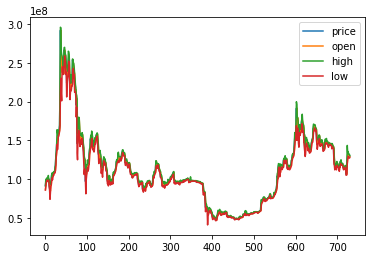

In [43]:
raw.plot()
plt.show()

In [44]:
raw.price.min(), raw.price.max()

(47169000, 292000000)

# **PreProcessing**

In [45]:
# Shift data 1 row up
# day 1-5 as features
# day 6 as label
# so on

data = raw.loc[:,['date','price']].copy()
data['next1'] = data['price'].shift(periods=-1)
data['next2'] = data['price'].shift(periods=-2)
data['next3'] = data['price'].shift(periods=-3)
data['next4'] = data['price'].shift(periods=-4)
data['target'] = data['price'].shift(periods=-5)
data.tail(15)

,date,price,next1,next2,next3,next4,target
716,10/18/19,113258000,113499000.0,116224000.0,116213000.0,114529000.0,106155000.0
717,10/19/19,113499000,116224000.0,116213000.0,114529000.0,106155000.0,106502000.0
718,10/20/19,116224000,116213000.0,114529000.0,106155000.0,106502000.0,119997000.0
719,10/21/19,116213000,114529000.0,106155000.0,106502000.0,119997000.0,127246000.0
720,10/22/19,114529000,106155000.0,106502000.0,119997000.0,127246000.0,131806000.0
721,10/23/19,106155000,106502000.0,119997000.0,127246000.0,131806000.0,129435000.0
722,10/24/19,106502000,119997000.0,127246000.0,131806000.0,129435000.0,131845000.0
723,10/25/19,119997000,127246000.0,131806000.0,129435000.0,131845000.0,129800000.0
724,10/26/19,127246000,131806000.0,129435000.0,131845000.0,129800000.0,129200000.0
725,10/27/19,131806000,129435000.0,131845000.0,129800000.0,129200000.0,129600000.0


In [46]:
X_train = data.iloc[:-5,1:-1].values
y_train = data.iloc[:-5,-1:].values

In [47]:
scaler = MinMaxScaler(feature_range=(1000000,10000000))
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

In [48]:
X_train_scaled

array([[2628874.61146669, 2802422.63438862, 2879467.87784227,
        2920653.83877042, 2949425.78349964],
       [2802422.63438862, 2879467.87784227, 2920653.83877042,
        2949425.78349964, 2868557.49476169],
       [2879467.87784227, 2920653.83877042, 2949425.78349964,
        2868557.49476169, 2886926.63919193],
       ...,
       [3677160.9804314 , 3943634.58875714, 4111260.42045329,
        4024102.33998146, 4112694.0624349 ],
       [3943634.58875714, 4111260.42045329, 4024102.33998146,
        4112694.0624349 , 4037519.75852731],
       [4111260.42045329, 4024102.33998146, 4112694.0624349 ,
        4037519.75852731, 4015463.72804098]])

# **Model KERAS**

In [58]:
model = Sequential()
#200 Hidden Layer
model.add(Dense(200, activation='relu', input_dim=5))
model.add(Dense(1))
#0.005 Learning Rate
adam = optimizers.Adam(lr=0.005, beta_1=0.8, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss='mape')

In [59]:
import time
start_time = time.time()
#100 epoch
model.fit(X_train_scaled, y_train_scaled, epochs=100, verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
726/726 [==============================] - 0s 484us/step - loss: 19.7705
Epoch 2/100
726/726 [==============================] - 0s 69us/step - loss: 5.1878
Epoch 3/100
726/726 [==============================] - 0s 69us/step - loss: 4.7902
Epoch 4/100
726/726 [==============================] - 0s 89us/step - loss: 5.3448
Epoch 5/100
726/726 [==============================] - 0s 73us/step - loss: 4.4177
Epoch 6/100
726/726 [==============================] - 0s 85us/step - loss: 4.3292
Epoch 7/100
726/726 [==============================] - 0s 85us/step - loss: 4.2909
Epoch 8/100
726/726 [==============================] - 0s 82us/step - loss: 4.3140
Epoch 9/100
726/726 [==============================] - 0s 72us/step - loss: 4.1892
Epoch 10/100
726/726 [==============================] - 0s 70us/step - loss: 4.2152
Epoch 11/100
726/726 [==============================] - 0s 73us/step - loss: 4.2990
Epoch 12/100
726/726 [==============================] - 0s 69us/step - loss: 4.6044

726/726 [==============================] - 0s 61us/step - loss: 3.3112
Epoch 99/100
726/726 [==============================] - 0s 62us/step - loss: 3.4406
Epoch 100/100
726/726 [==============================] - 0s 67us/step - loss: 3.2922
--- 6.594832897186279 seconds ---


# **Model SKLEARN**

In [60]:
from sklearn.neural_network import MLPRegressor
model_sklearn = MLPRegressor(hidden_layer_sizes=(200,),
                     beta_1=0.8,
                     beta_2=0.999,
                     activation='relu',
                     max_iter=100,
                     solver='adam',
                     alpha=0.005,
                     random_state=0)
model_sklearn.fit(X_train_scaled, y_train_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.8,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


# **Predict**

In [61]:
# Mape (Mean Abosulte Percentage of Error)
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
column = ['date','price','open','high','low','vol','change'] 
#link = "/content/drive/My Drive/kambing/kambing/datasets/testing/test_btc.csv"
link_btc = "datasets/testing/test_btc.csv"
link_bch = "datasets/testing/test_bch.csv"
link_bsv = "datasets/testing/test_bsv.csv"
link_eth = "datasets/testing/test_eth.csv"
link_xrp = "datasets/testing/test_xrp.csv"

raw_test_btc = pd.read_csv(link_btc, names=column)
raw_test_bch = pd.read_csv(link_bch, names=column)
raw_test_bsv = pd.read_csv(link_bsv, names=column)
raw_test_eth = pd.read_csv(link_eth, names=column)
raw_test_xrp = pd.read_csv(link_xrp, names=column)

In [63]:
data_test_btc = raw_test_btc.loc[:,['date','price']].copy()
data_test_btc['next1'] = data_test_btc['price'].shift(periods=-1)
data_test_btc['next2'] = data_test_btc['price'].shift(periods=-2)
data_test_btc['next3'] = data_test_btc['price'].shift(periods=-3)
data_test_btc['next4'] = data_test_btc['price'].shift(periods=-4)
data_test_btc['target'] = data_test_btc['price'].shift(periods=-5)
#data_test.tail(15)

data_test_bch = raw_test_bch.loc[:,['date','price']].copy()
data_test_bch['next1'] = data_test_bch['price'].shift(periods=-1)
data_test_bch['next2'] = data_test_bch['price'].shift(periods=-2)
data_test_bch['next3'] = data_test_bch['price'].shift(periods=-3)
data_test_bch['next4'] = data_test_bch['price'].shift(periods=-4)
data_test_bch['target'] = data_test_bch['price'].shift(periods=-5)
#data_test.tail(15)

data_test_bsv = raw_test_bsv.loc[:,['date','price']].copy()
data_test_bsv['next1'] = data_test_bsv['price'].shift(periods=-1)
data_test_bsv['next2'] = data_test_bsv['price'].shift(periods=-2)
data_test_bsv['next3'] = data_test_bsv['price'].shift(periods=-3)
data_test_bsv['next4'] = data_test_bsv['price'].shift(periods=-4)
data_test_bsv['target'] = data_test_bsv['price'].shift(periods=-5)
#data_test.tail(15)

data_test_eth = raw_test_eth.loc[:,['date','price']].copy()
data_test_eth['next1'] = data_test_eth['price'].shift(periods=-1)
data_test_eth['next2'] = data_test_eth['price'].shift(periods=-2)
data_test_eth['next3'] = data_test_eth['price'].shift(periods=-3)
data_test_eth['next4'] = data_test_eth['price'].shift(periods=-4)
data_test_eth['target'] = data_test_eth['price'].shift(periods=-5)
#data_test.tail(15)

data_test_xrp = raw_test_xrp.loc[:,['date','price']].copy()
data_test_xrp['next1'] = data_test_xrp['price'].shift(periods=-1)
data_test_xrp['next2'] = data_test_xrp['price'].shift(periods=-2)
data_test_xrp['next3'] = data_test_xrp['price'].shift(periods=-3)
data_test_xrp['next4'] = data_test_xrp['price'].shift(periods=-4)
data_test_xrp['target'] = data_test_xrp['price'].shift(periods=-5)
#data_test.tail(15)

In [64]:
X_test_btc = data_test_btc.iloc[:-5,1:-1].values
y_test_btc = data_test_btc.iloc[:-5,-1:].values

X_test_bch = data_test_bch.iloc[:-5,1:-1].values
y_test_bch = data_test_bch.iloc[:-5,-1:].values

X_test_bsv = data_test_bsv.iloc[:-5,1:-1].values
y_test_bsv = data_test_bsv.iloc[:-5,-1:].values

X_test_eth = data_test_eth.iloc[:-5,1:-1].values
y_test_eth = data_test_eth.iloc[:-5,-1:].values

X_test_xrp = data_test_xrp.iloc[:-5,1:-1].values
y_test_xrp = data_test_xrp.iloc[:-5,-1:].values

In [65]:
y_pred_btc = model.predict(X_test_btc, verbose=0)
y_pred_bch = model.predict(X_test_bch, verbose=0)
y_pred_bsv = model.predict(X_test_bsv, verbose=0)
y_pred_eth = model.predict(X_test_eth, verbose=0)
y_pred_xrp = model.predict(X_test_xrp, verbose=0)

In [66]:
mape_btc = mape(y_test_btc, y_pred_btc)
mape_bch = mape(y_test_bch, y_pred_bch)
mape_bsv = mape(y_test_bsv, y_pred_bsv)
mape_eth = mape(y_test_eth, y_pred_eth)
mape_xrp = mape(y_test_xrp, y_pred_xrp)

In [67]:
print("BTC: ",mape_btc, "\nBCH: ",mape_bch, "\nBSV: ", mape_bsv, "\nETH: ", mape_eth, "\nXRP: ", mape_xrp)

BTC:  1.8333064100284493 
BCH:  2.602372789868126 
BSV:  2.9326455845953943 
ETH:  2.120905086592687 
XRP:  2.007706473476997


In [68]:
btc_viz = raw_test_btc[["date","price"]].copy()
btc_viz['predicted'] = pd.Series(y_pred_btc.ravel())
btc_viz['predicted'] = btc_viz['predicted'].shift(periods=5)

bch_viz = raw_test_bch[["date","price"]].copy()
bch_viz['predicted'] = pd.Series(y_pred_bch.ravel())
bch_viz['predicted'] = bch_viz['predicted'].shift(periods=5)

bsv_viz = raw_test_bsv[["date","price"]].copy()
bsv_viz['predicted'] = pd.Series(y_pred_bsv.ravel())
bsv_viz['predicted'] = bsv_viz['predicted'].shift(periods=5)

eth_viz = raw_test_eth[["date","price"]].copy()
eth_viz['predicted'] = pd.Series(y_pred_eth.ravel())
eth_viz['predicted'] = eth_viz['predicted'].shift(periods=5)

xrp_viz = raw_test_xrp[["date","price"]].copy()
xrp_viz['predicted'] = pd.Series(y_pred_xrp.ravel())
xrp_viz['predicted'] = xrp_viz['predicted'].shift(periods=5)

# Dump Model

In [69]:
# serialize model to JSON
model_json = model.to_json()
with open("model_keras.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model_keras_weight.h5")
print("Saved model to disk")

Saved model to disk


In [71]:
### TEST dumped model
from keras.models import model_from_json
# load json and create model
json_file = open('model_keras.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_keras_weight.h5")
print("Loaded model from disk")

Loaded model from disk


In [89]:
# Dump Sklearn model
import pickle
pickle.dump(model_sklearn, open('model_sklearn.pkl','wb'))

In [91]:
model = pickle.load(open('model_sklearn.pkl','rb'))
mape(model_sklearn.predict(X_test_btc), y_test_btc)

9.088822397248816

In [93]:
mape(loaded_model.predict(X_test_btc, verbose=0), y_test_btc)

1.8188159518472147

# Visualization

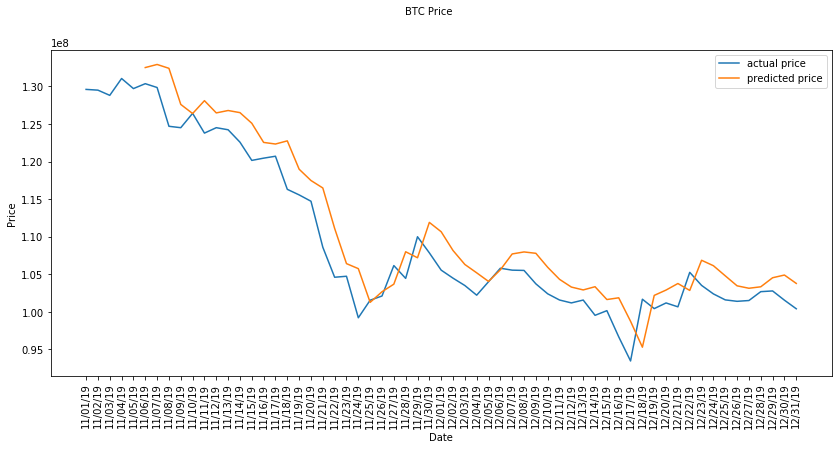

In [40]:
plt.figure(figsize = (14,6))
plt.plot(btc_viz.date, btc_viz.price, label='actual price')
plt.plot(btc_viz.date, btc_viz.predicted, label='predicted price')
plt.xticks(np.arange(0, 61, 1))
plt.xticks(rotation=90)
plt.suptitle('BTC Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(loc='upper right')
plt.savefig('validation_BTC.jpg')
plt.show()

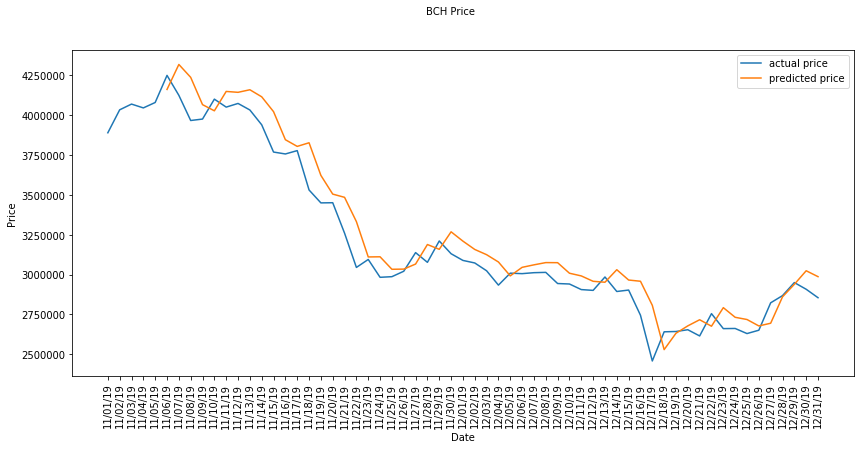

In [41]:
plt.figure(figsize = (14,6))
plt.plot(bch_viz.date, bch_viz.price, label='actual price')
plt.plot(bch_viz.date, bch_viz.predicted, label='predicted price')
plt.xticks(np.arange(0, 61, 1))
plt.xticks(rotation=90)
plt.suptitle('BCH Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(loc='upper right')
plt.savefig('validation_BCH.jpg')
plt.show()

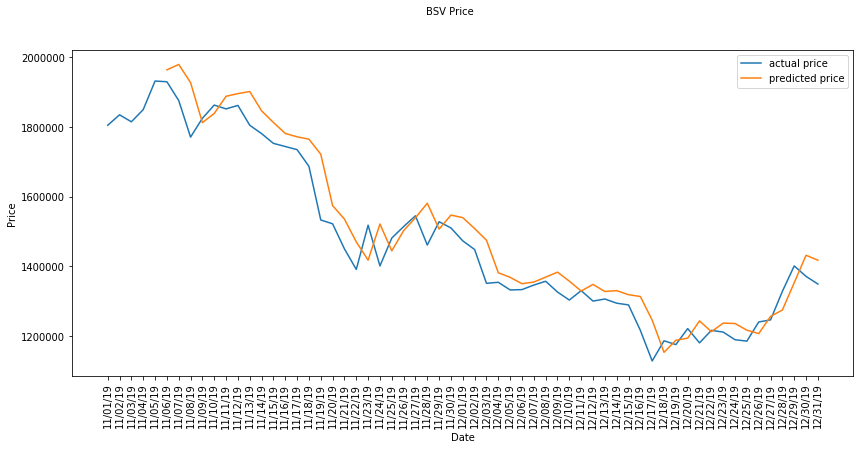

In [42]:
plt.figure(figsize = (14,6))
plt.plot(bsv_viz.date, bsv_viz.price, label='actual price')
plt.plot(bsv_viz.date, bsv_viz.predicted, label='predicted price')
plt.xticks(np.arange(0, 61, 1))
plt.xticks(rotation=90)
plt.suptitle('BSV Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(loc='upper right')
plt.savefig('validation_BSV.jpg')
plt.show()

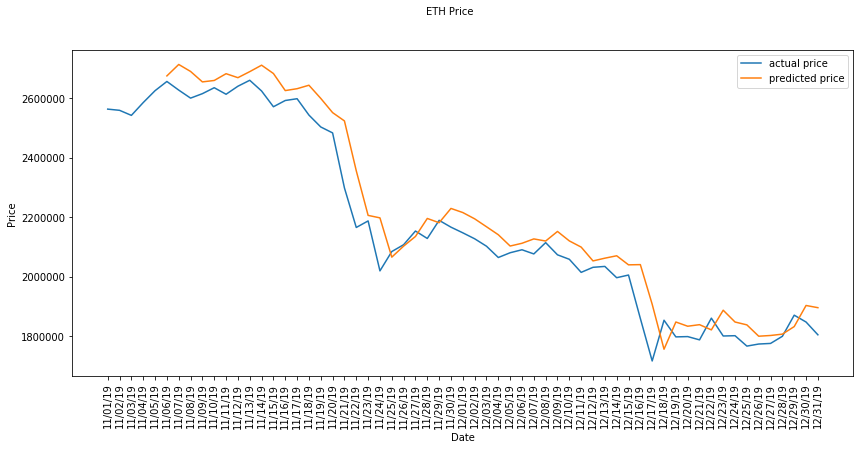

In [43]:
plt.figure(figsize = (14,6))
plt.plot(eth_viz.date, eth_viz.price, label='actual price')
plt.plot(eth_viz.date, eth_viz.predicted, label='predicted price')
plt.xticks(np.arange(0, 61, 1))
plt.xticks(rotation=90)
plt.suptitle('ETH Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(loc='upper right')
plt.savefig('validation_ETH.jpg')
plt.show()

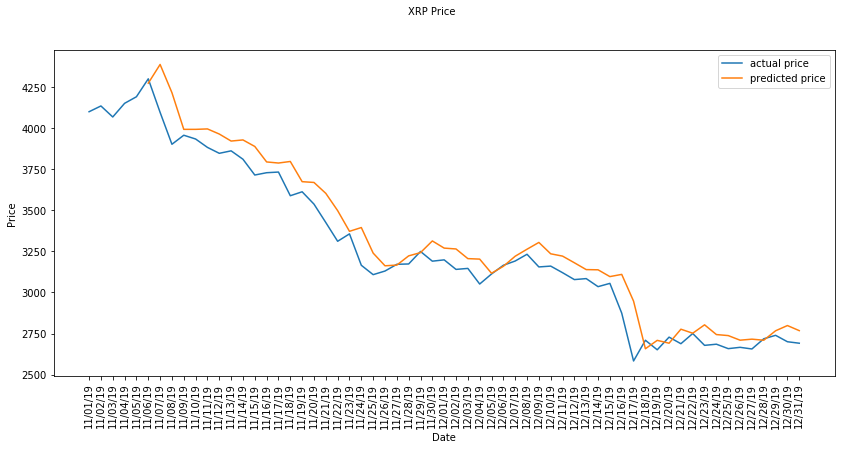

In [44]:
plt.figure(figsize = (14,6))
plt.plot(xrp_viz.date, xrp_viz.price, label='actual price')
plt.plot(xrp_viz.date, xrp_viz.predicted, label='predicted price')
plt.xticks(np.arange(0, 61, 1))
plt.xticks(rotation=90)
plt.suptitle('XRP Price', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.legend(loc='upper right')
plt.savefig('validation_XRP.jpg')
plt.show()